In [2]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import os
# Add the project root directory to sys.path
project_root = os.path.abspath("..")  # Adjust if notebook is located elsewhere
sys.path.append(project_root)

# Confirm sys.path includes the project directory
print("Project root added to sys.path:")
print("\n".join(sys.path))

Project root added to sys.path:
C:\Users\HP\AppData\Local\Programs\Python\Python312\python312.zip
C:\Users\HP\AppData\Local\Programs\Python\Python312\DLLs
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib
C:\Users\HP\AppData\Local\Programs\Python\Python312
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv

c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\win32
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\win32\lib
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\Pythonwin
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis


In [4]:
file_path = "../data/Week2_challenge_data_source.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

In [5]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [20]:
#print(df.head())
#print(df.info())
numeric_cols = df.select_dtypes(include=["number"]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [33]:
# Top 10 handsets
top_handsets = df["Handset Type"].value_counts().head(10)

# Top 3 handset manufacturers
top_manufacturers = df["Handset Manufacturer"].value_counts().head(3)

# Top 5 handsets per top 3 manufacturers
manufacturer_handsets = df[df["Handset Manufacturer"].isin(top_manufacturers.index)]
top_handsets_by_manufacturer = (
    manufacturer_handsets.groupby("Handset Manufacturer")["Handset Type"]
    .value_counts()
    .groupby(level=0)
    .head(5)
)


In [34]:
top_handsets


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [35]:
top_manufacturers


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [36]:
top_handsets_by_manufacturer


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

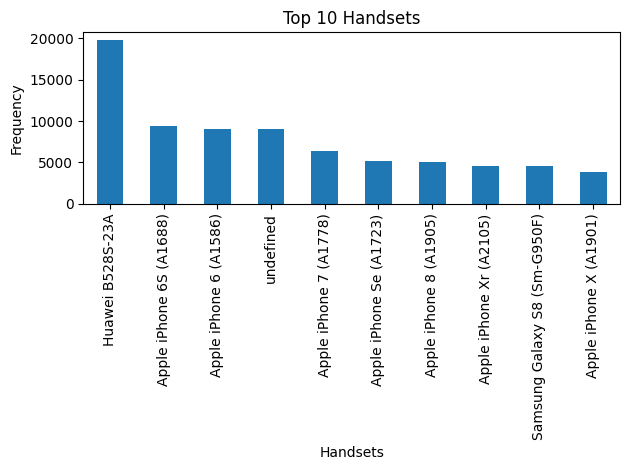

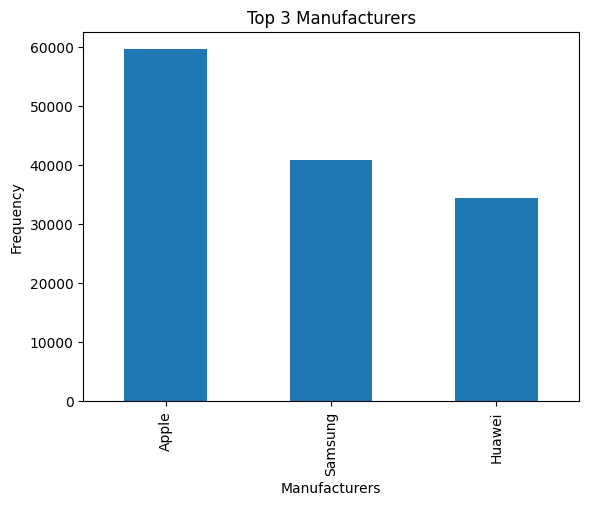

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot top 10 handsets
from IPython.display import display

# Example plotting code
top_handsets.plot(kind="bar", title="Top 10 Handsets", legend=False)
plt.xlabel("Handsets")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout for better readability
plt.show()
# Plot top 3 manufacturers
top_manufacturers.plot(kind="bar", title="Top 3 Manufacturers")
plt.xlabel("Manufacturers")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Grouping by 'IMSI' and aggregating relevant columns
user_behavior = df.groupby("IMSI").agg(
    {
        "Total DL (Bytes)": "sum",  # Sum of download data for each IMSI
        "Total UL (Bytes)": "sum",  # Sum of upload data for each IMSI
        # You can add more columns here as necessary, e.g., if you want to aggregate other columns
    }
)

# Add a new column for total data, if it's not already present
user_behavior["Total Data (Bytes)"] = (
    user_behavior["Total DL (Bytes)"] + user_behavior["Total UL (Bytes)"]
)

# Display the result (optional)
print(user_behavior.head())


              Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
IMSI                                                                
2.040471e+14        78697597.0        60456049.0        1.391536e+08
2.040808e+14       194828056.0        37295915.0        2.321240e+08
2.082001e+14        31376981.0        53794658.0        8.517164e+07
2.082001e+14       392918313.0        33583272.0        4.265016e+08
2.082001e+14       961767023.0        71325004.0        1.033092e+09


In [50]:
print(user_behavior.describe())


       Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
count      1.072660e+05      1.072660e+05        1.072660e+05
mean       6.357743e+08      5.750398e+07        6.932783e+08
std        9.140068e+08      8.009000e+07        9.893354e+08
min        8.827082e+06      2.866892e+06        3.324901e+07
25%        3.148034e+08      3.639252e+07        3.584920e+08
50%        5.700629e+08      4.678069e+07        6.176314e+08
75%        8.070716e+08      6.565887e+07        8.571697e+08
max        2.584708e+11      2.354725e+10        2.820181e+11


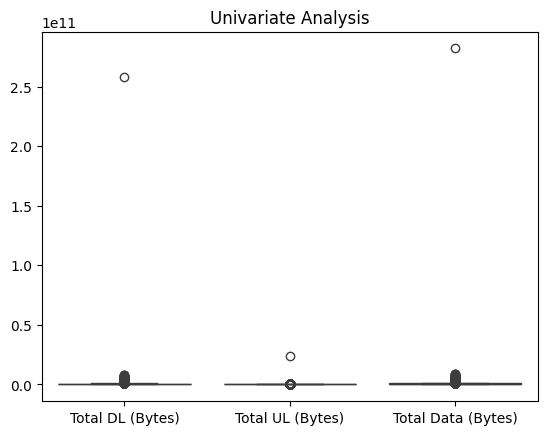

In [51]:
sns.boxplot(data=user_behavior)
plt.title("Univariate Analysis")
plt.show()


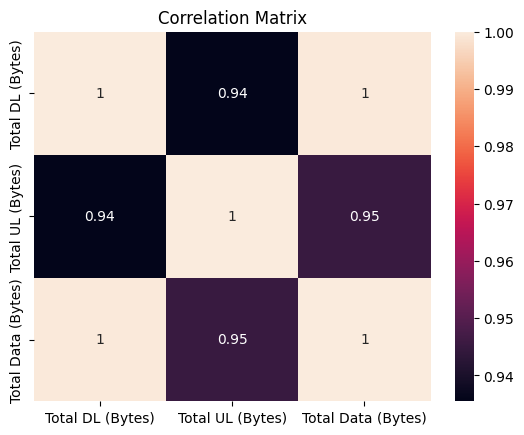

In [52]:
correlation_matrix = user_behavior.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [56]:
from sklearn.decomposition import PCA

# Assuming 'user_behavior' is a DataFrame with numerical values
pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


[9.99394106e-01 6.05893624e-04]


In [59]:
# Assuming 'IMSI' is the column you want to group by
engagement_metrics = df.groupby("IMSI").agg(
    {
        "IMSI": "count",  # This counts the number of sessions for each IMSI
        "Dur. (ms)": "sum",  # Sum the session duration (in milliseconds)
        "Total DL (Bytes)": "sum",  # Sum the total download data
        "Total UL (Bytes)": "sum",  # Sum the total upload data
    }
)

# Add a new column for total data (bytes)
engagement_metrics["Total Data (Bytes)"] = (
    engagement_metrics["Total DL (Bytes)"] + engagement_metrics["Total UL (Bytes)"]
)

# Rename the count column to 'Session Count'
engagement_metrics.rename(columns={"IMSI": "Session Count"}, inplace=True)

# Display the result
print(engagement_metrics)


              Session Count  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
IMSI                                                                         
2.040471e+14              1   869844.0        78697597.0        60456049.0   
2.040808e+14              1   877385.0       194828056.0        37295915.0   
2.082001e+14              1    86019.0        31376981.0        53794658.0   
2.082001e+14              1    86254.0       392918313.0        33583272.0   
2.082001e+14              2   573923.0       961767023.0        71325004.0   
...                     ...        ...               ...               ...   
2.082099e+14              1   127367.0       688815403.0        33888182.0   
2.082099e+14              1   168543.0       451173021.0        44692550.0   
2.082099e+14              1    86399.0       307825104.0        30355487.0   
2.082522e+14              1    56613.0       800629358.0        45083854.0   
2.140743e+14              1   226790.0       637123579.0        

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)


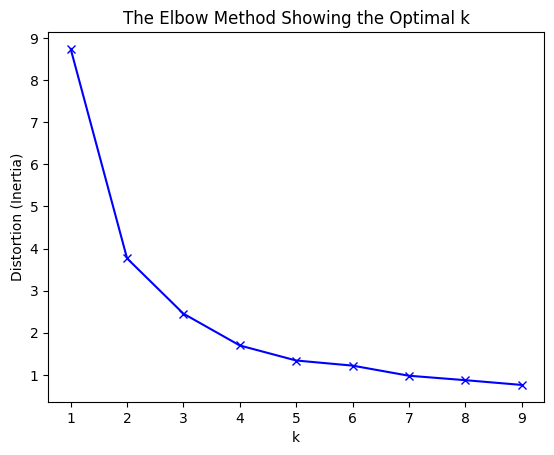

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'normalized_metrics' is your dataset
distortions = []
K = range(1, 10)  # Range for different k values

# Loop through each k, fit the model, and calculate the distortion (inertia)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)  # Make sure 'normalized_metrics' is your data
    distortions.append(kmeans.inertia_)  # Store inertia value for each k

# Plot the distortions (inertia) for each k to visualize the elbow point
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion (Inertia)")
plt.title("The Elbow Method Showing the Optimal k")
plt.show()


In [63]:
kmeans = KMeans(n_clusters=3)
engagement_clusters = kmeans.fit_predict(normalized_metrics)
engagement_metrics["Cluster"] = engagement_clusters


In [71]:
# Remove any leading/trailing spaces from column names
engagement_metrics.columns = engagement_metrics.columns.str.strip()

# Check the columns to verify they have been cleaned properly
print(engagement_metrics.columns)


Index(['Session Count', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Total Data (Bytes)', 'Cluster'],
      dtype='object')


In [72]:
# Aggregating the data by 'Cluster' and calculating the mean, min, and max for each column
cluster_summary = engagement_metrics.groupby("Cluster").agg(
    {
        "Session Count": ["mean", "min", "max"],
        "Dur. (ms)": ["mean", "min", "max"],
        "Total Data (Bytes)": ["mean", "min", "max"],
    }
)

# Print the result
print(cluster_summary)


        Session Count               Dur. (ms)                              \
                 mean  min  max          mean           min           max   
Cluster                                                                     
0            1.220468    1    4  1.130992e+05  7.142000e+03  4.517680e+05   
1          570.000000  570  570  3.761205e+07  3.761205e+07  3.761205e+07   
2            3.218254    1   18  4.930964e+05  8.555400e+04  1.855375e+07   

        Total Data (Bytes)                              
                      mean           min           max  
Cluster                                                 
0             5.991582e+08  3.324901e+07  2.439177e+09  
1             2.820181e+11  2.820181e+11  2.820181e+11  
2             1.658007e+09  5.714004e+07  8.846226e+09  


In [74]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


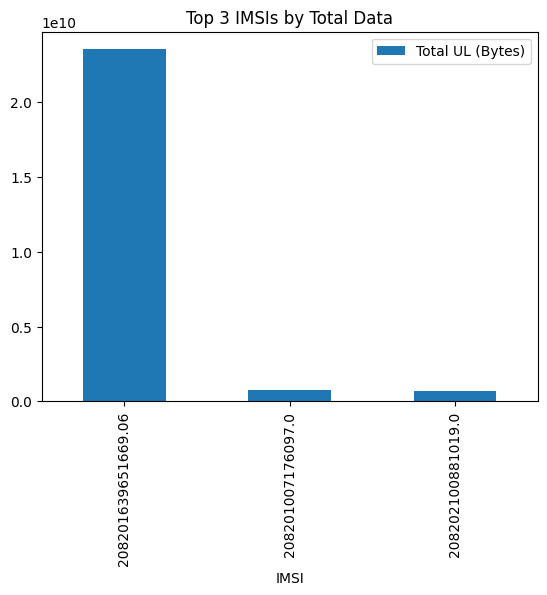

In [76]:
# Clean column names (if needed)
df.columns = df.columns.str.strip()

# Check the exact column name
print(df.columns)

# Perform aggregation with the correct column name
application_traffic = (
    df.groupby("IMSI")  # Group by IMSI or another relevant identifier
    .agg(
        {
            "Total UL (Bytes)": "sum",  # Replace with the correct column if needed
        }
    )
    .sort_values("Total UL (Bytes)", ascending=False)
)

# Plot top 3 IMSIs (or use another identifier)
application_traffic.head(3).plot(kind="bar")
plt.title("Top 3 IMSIs by Total Data")
plt.show()


In [19]:
top_handsets = df["Handset Type"].value_counts().head(10)
print(top_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [20]:
top_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
print(top_manufacturers)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [21]:
top_manufacturer_handsets = {}
for manufacturer in top_manufacturers.index:
    handsets = (
        df[df["Handset Manufacturer"] == manufacturer]["Handset Type"]
        .value_counts()
        .head(5)
    )
    top_manufacturer_handsets[manufacturer] = handsets
print(top_manufacturer_handsets)


{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


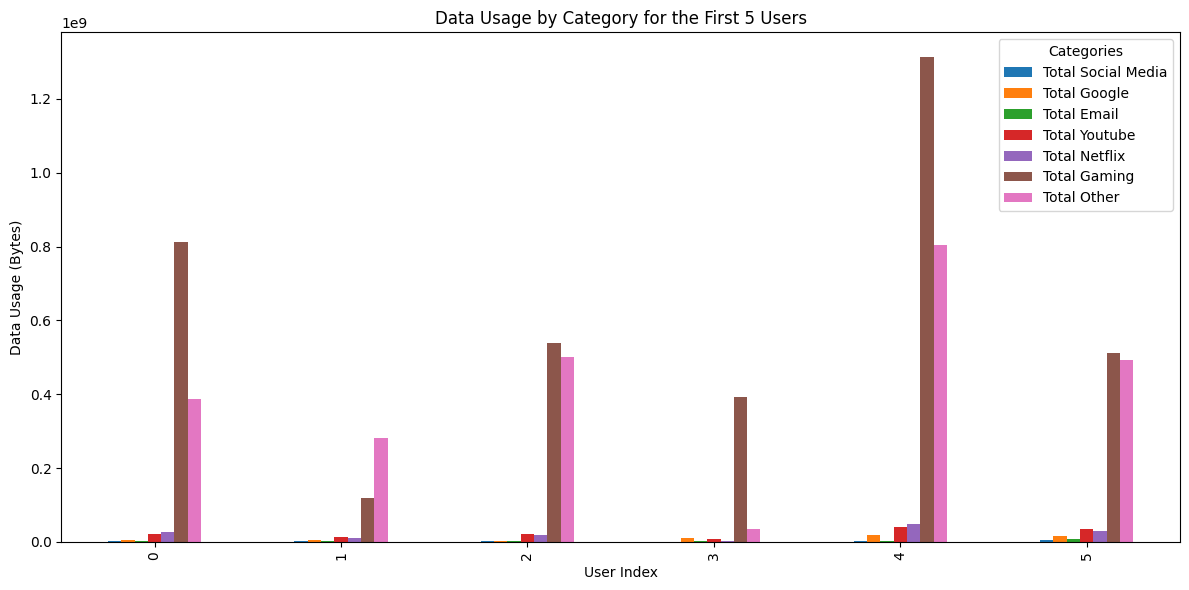

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating the data
user_aggregate = df.groupby("MSISDN/Number").agg(
    {
        "Social Media DL (Bytes)": "sum",
        "Social Media UL (Bytes)": "sum",
        "Google DL (Bytes)": "sum",
        "Google UL (Bytes)": "sum",
        "Email DL (Bytes)": "sum",
        "Email UL (Bytes)": "sum",
        "Youtube DL (Bytes)": "sum",
        "Youtube UL (Bytes)": "sum",
        "Netflix DL (Bytes)": "sum",
        "Netflix UL (Bytes)": "sum",
        "Gaming DL (Bytes)": "sum",
        "Gaming UL (Bytes)": "sum",
        "Other DL (Bytes)": "sum",
        "Other UL (Bytes)": "sum",
    }
)

# Summing up for each category (Download + Upload)
user_aggregate["Total Social Media"] = (
    user_aggregate["Social Media DL (Bytes)"]
    + user_aggregate["Social Media UL (Bytes)"]
)
user_aggregate["Total Google"] = (
    user_aggregate["Google DL (Bytes)"] + user_aggregate["Google UL (Bytes)"]
)
user_aggregate["Total Email"] = (
    user_aggregate["Email DL (Bytes)"] + user_aggregate["Email UL (Bytes)"]
)
user_aggregate["Total Youtube"] = (
    user_aggregate["Youtube DL (Bytes)"] + user_aggregate["Youtube UL (Bytes)"]
)
user_aggregate["Total Netflix"] = (
    user_aggregate["Netflix DL (Bytes)"] + user_aggregate["Netflix UL (Bytes)"]
)
user_aggregate["Total Gaming"] = (
    user_aggregate["Gaming DL (Bytes)"] + user_aggregate["Gaming UL (Bytes)"]
)
user_aggregate["Total Other"] = (
    user_aggregate["Other DL (Bytes)"] + user_aggregate["Other UL (Bytes)"]
)

# Resetting index for plotting
user_aggregate_reset = user_aggregate.reset_index()

# Plotting total data usage by category for the first few users
categories = [
    "Total Social Media",
    "Total Google",
    "Total Email",
    "Total Youtube",
    "Total Netflix",
    "Total Gaming",
    "Total Other",
]

user_aggregate_reset.loc[:5, categories].plot(kind="bar", figsize=(12, 6))

# Adding labels and title
plt.xlabel("User Index")
plt.ylabel("Data Usage (Bytes)")
plt.title("Data Usage by Category for the First 5 Users")
plt.legend(title="Categories")
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
user_aggregate


Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360100e+10                 2206504.0                  25631.0   
3.360100e+10                 2598548.0                  62017.0   
3.360100e+10                 3148004.0                  47619.0   
3.360101e+10                  251469.0                  28825.0   
3.360101e+10                 2861230.0                  51312.0   
...                                ...                      ...   
3.379000e+10                  234320.0                  65863.0   
3.379000e+10                  442214.0                  56355.0   
3.197021e+12                  668596.0                  46628.0   
3.370000e+14                  496337.0                  25229.0   
8.823971e+14                 1500145.0                  45943.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.360100e+10           3337123.0          1051882.0          837400.0   
3.360100e+10           4197697.0          1137166.0         2828821.0   
3.360100e+10           3343483.0            99643.0         2436500.0   
3.360101e+10           5937765.0          3740728.0         2178618.0   
3.360101e+10          13728668.0          4770948.0         2247808.0   
...                          ...                ...               ...   
3.379000e+10           6834178.0           697091.0          480946.0   
3.379000e+10           1472406.0          3957299.0         2513433.0   
3.197021e+12           8572779.0          1865881.0          842279.0   
3.370000e+14           8215537.0          1615080.0         2989663.0   
8.823971e+14           5985089.0          3233558.0         2518425.0   

               Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
MSISDN/Number                                                             
3.360100e+10           493962.0          14900201.0           6724347.0   
3.360100e+10           478960.0           5324251.0           7107972.0   
3.360100e+10           768880.0           2137272.0          19196298.0   
3.360101e+10           106052.0           4393123.0           2584198.0   
3.360101e+10          1057661.0          10339971.0          31193031.0   
...                         ...                 ...                 ...   
3.379000e+10           525969.0           8294310.0          18353533.0   
3.379000e+10              664.0           5596862.0          14254710.0   
3.197021e+12           678492.0           9839889.0           2120016.0   
3.370000e+14           328919.0          16690728.0          20044212.0   
8.823971e+14           812549.0          18980320.0          21960390.0   

               Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
MSISDN/Number                                                              
3.360100e+10           10265105.0          16915876.0       8.110911e+08   
3.360100e+10             770569.0          10451194.0       1.050353e+08   
3.360100e+10           16525919.0           2827981.0       5.290685e+08   
3.360101e+10            1157362.0            784730.0       3.880748e+08   
3.360101e+10           24971647.0          24230077.0       1.308981e+09   
...                           ...                 ...                ...   
3.379000e+10           14754741.0            147797.0       6.573267e+08   
3.379000e+10            6929961.0           1601099.0       4.276202e+08   
3.197021e+12           10340908.0          16251392.0       1.645636e+08   
3.370000e+14            9983678.0          20921364.0       5.012590e+08   
8.823971e+14           21621336.0           7224894.0       2.809228e+07   

               Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
MSISDN/Number                                                         
3.360100e+10           1367528.0       377096990.0         9473882.0  
3.360100e+10   

In [11]:
import pandas as pd
import numpy as np

# Replace missing values for numerical columns with the mean
df["TCP DL Retrans. Vol (Bytes)"] = df["TCP DL Retrans. Vol (Bytes)"].fillna(
    df["TCP DL Retrans. Vol (Bytes)"].mean()
)
df["Avg RTT DL (ms)"] = df["Avg RTT DL (ms)"].fillna(df["Avg RTT DL (ms)"].mean())
df["Avg Bearer TP DL (kbps)"] = df["Avg Bearer TP DL (kbps)"].fillna(
    df["Avg Bearer TP DL (kbps)"].mean()
)

# Replace missing values for categorical columns with the mode (most frequent)
df["Handset Type"] = df["Handset Type"].fillna(df["Handset Type"].mode()[0])

# Grouping by Customer_ID and calculating the required aggregates
aggregated_df = (
    df.groupby("IMSI")
    .agg(
        avg_TCP_retransmission=("TCP DL Retrans. Vol (Bytes)", "mean"),
        avg_RTT=("Avg RTT DL (ms)", "mean"),
        avg_Throughput=("Avg Bearer TP DL (kbps)", "mean"),
        most_frequent_Handset_type=("Handset Type", lambda x: x.mode()[0]),
    )
    .reset_index()
)

print(aggregated_df.head())


           IMSI  avg_TCP_retransmission     avg_RTT  avg_Throughput  \
0  2.040471e+14            2.080991e+07  109.795706             2.0   
1  2.040808e+14            2.080991e+07  109.795706             1.0   
2  2.082001e+14            2.697000e+03  287.000000            87.0   
3  2.082001e+14            9.107000e+03   82.000000           627.0   
4  2.082001e+14            2.080991e+07   87.000000            38.0   

         most_frequent_Handset_type  
0  Quectel Wireless. Quectel Ec21-E  
1  Quectel Wireless. Quectel Ec25-E  
2  Dn Electronics Danew Konnect 350  
3  Samsung Galaxy Grand (Gt-I9060X)  
4           Apple iPhone 6S (A1688)  


C:\Users\HP\AppData\Local\Temp\ipykernel_13260\1180840961.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


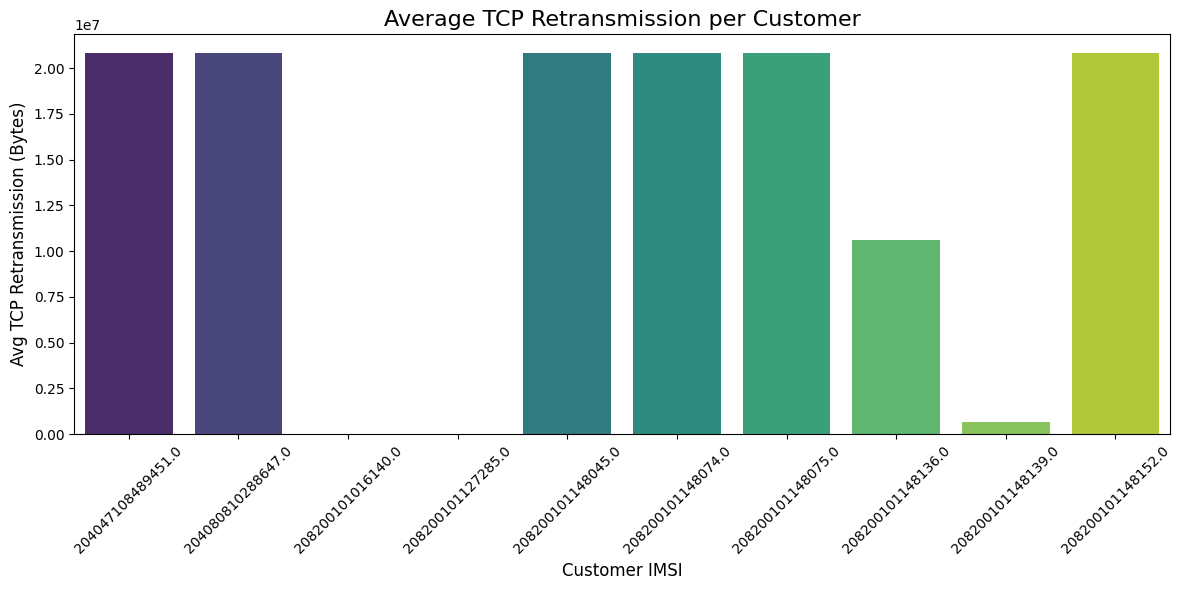

C:\Users\HP\AppData\Local\Temp\ipykernel_13260\1180840961.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample plot: Average TCP retransmission per customer
plt.figure(figsize=(12, 6))
sns.barplot(
    x=aggregated_df["IMSI"][:10],  # Plot for the first 10 customers
    y=aggregated_df["avg_TCP_retransmission"],
    palette="viridis",
)
plt.title("Average TCP Retransmission per Customer", fontsize=16)
plt.xlabel("Customer IMSI", fontsize=12)
plt.ylabel("Avg TCP Retransmission (Bytes)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sample plot: Average RTT and Throughput distribution
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x=aggregated_df["avg_RTT"],
    y=aggregated_df["avg_Throughput"],
    hue=aggregated_df["most_frequent_Handset_type"],
    palette="tab10",
)
plt.title("Average RTT vs Throughput", fontsize=16)
plt.xlabel("Avg RTT (ms)", fontsize=12)
plt.ylabel("Avg Throughput (kbps)", fontsize=12)
plt.legend(title="Handset Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [14]:
# Top 10, Bottom 10, and Most Frequent TCP, RTT, and Throughput values
top_tcp = df["TCP DL Retrans. Vol (Bytes)"].nlargest(10)
bottom_tcp = df["TCP DL Retrans. Vol (Bytes)"].nsmallest(10)
most_frequent_tcp = df["TCP DL Retrans. Vol (Bytes)"].mode().head(10)

top_rtt = df["Avg RTT DL (ms)"].nlargest(10)
bottom_rtt = df["Avg RTT DL (ms)"].nsmallest(10)
most_frequent_rtt = df["Avg RTT DL (ms)"].mode().head(10)

top_throughput = df["Avg Bearer TP DL (kbps)"].nlargest(10)
bottom_throughput = df["Avg Bearer TP DL (kbps)"].nsmallest(10)
most_frequent_throughput = df["Avg Bearer TP DL (kbps)"].mode().head(10)

# Display the results
print("Top 10 TCP retransmissions:", top_tcp)
print("Bottom 10 TCP retransmissions:", bottom_tcp)
print("Most Frequent TCP retransmissions:", most_frequent_tcp)

print("Top 10 RTT values:", top_rtt)
print("Bottom 10 RTT values:", bottom_rtt)
print("Most Frequent RTT values:", most_frequent_rtt)

print("Top 10 Throughput values:", top_throughput)
print("Bottom 10 Throughput values:", bottom_throughput)
print("Most Frequent Throughput values:", most_frequent_throughput)


Top 10 TCP retransmissions: 77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP retransmissions: 59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent TCP retransmissions: 0    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Top 10 RTT values: 30155     96923.0
29916     64640.0
17894     55811.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT values: 42602     0.0
52217     0.0
60143     0.0
61144     0.0
61337     0.0
103321    0.0
124538    0.0
142526    0

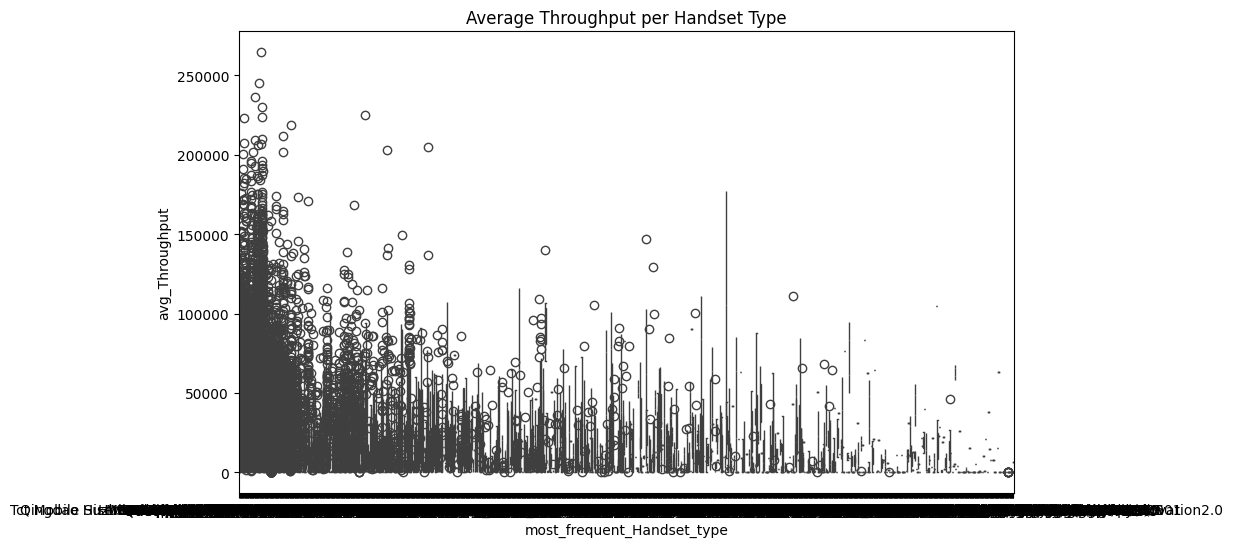

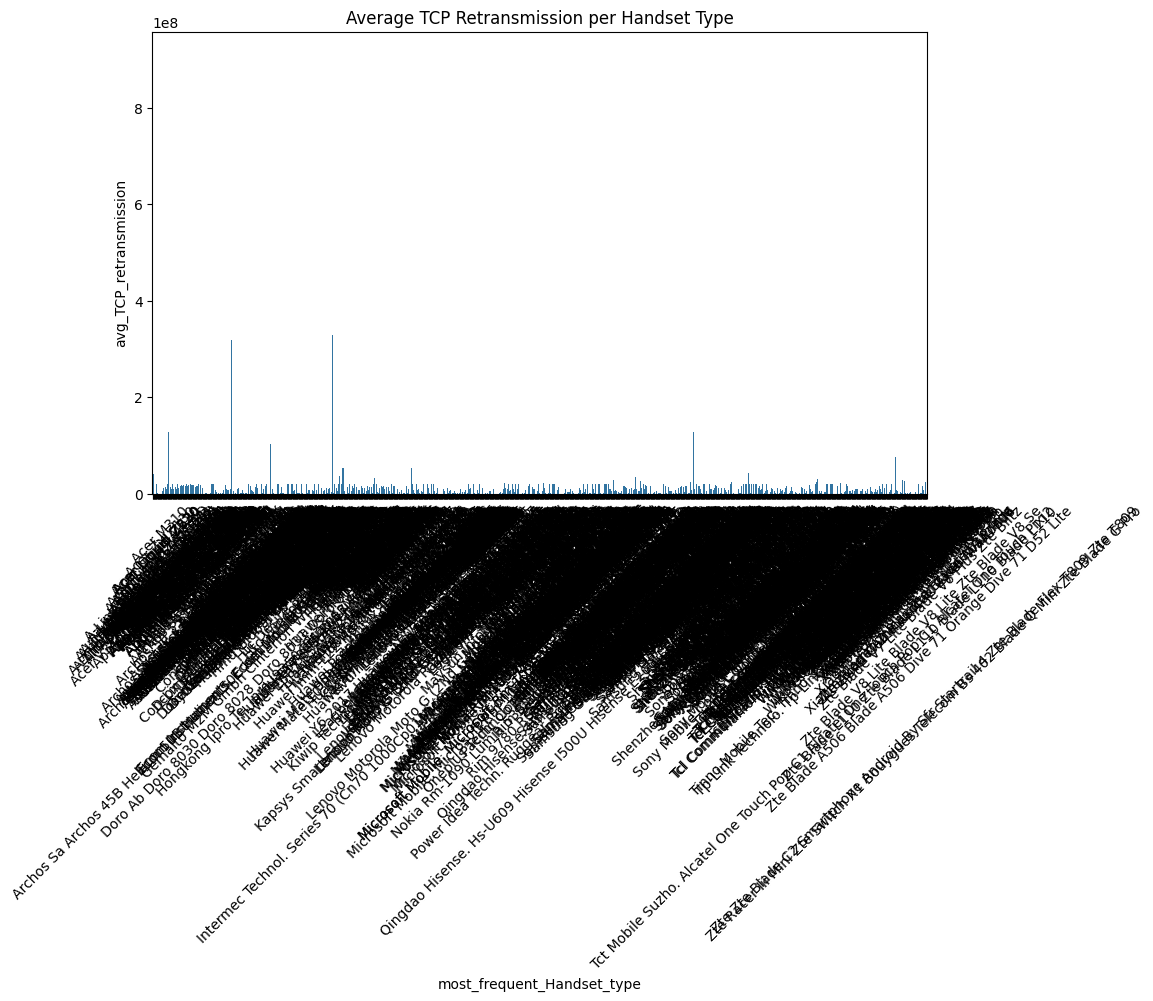

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_df, x="most_frequent_Handset_type", y="avg_Throughput")
plt.title("Average Throughput per Handset Type")
plt.show()

# Average TCP retransmission per handset type
avg_tcp_per_handset = (
    aggregated_df.groupby("most_frequent_Handset_type")["avg_TCP_retransmission"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="most_frequent_Handset_type", y="avg_TCP_retransmission", data=avg_tcp_per_handset
)
plt.title("Average TCP Retransmission per Handset Type")
plt.xticks(rotation=45)
plt.show()


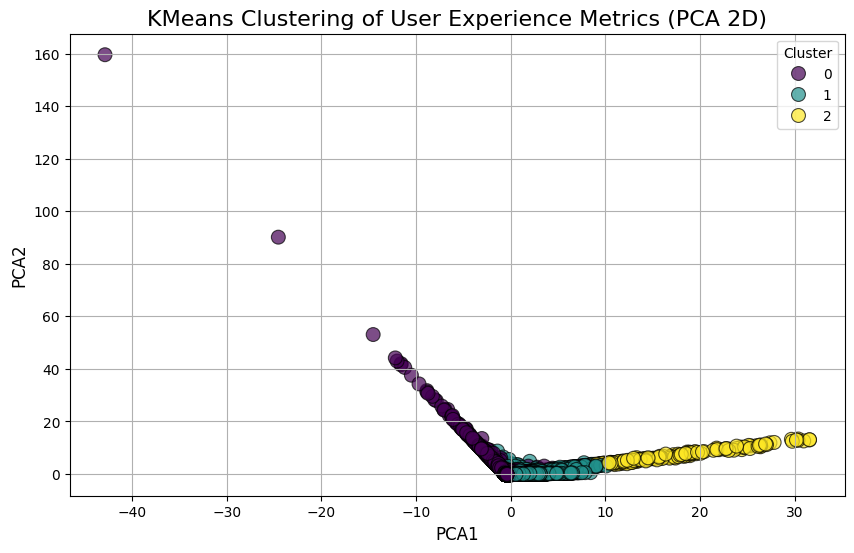

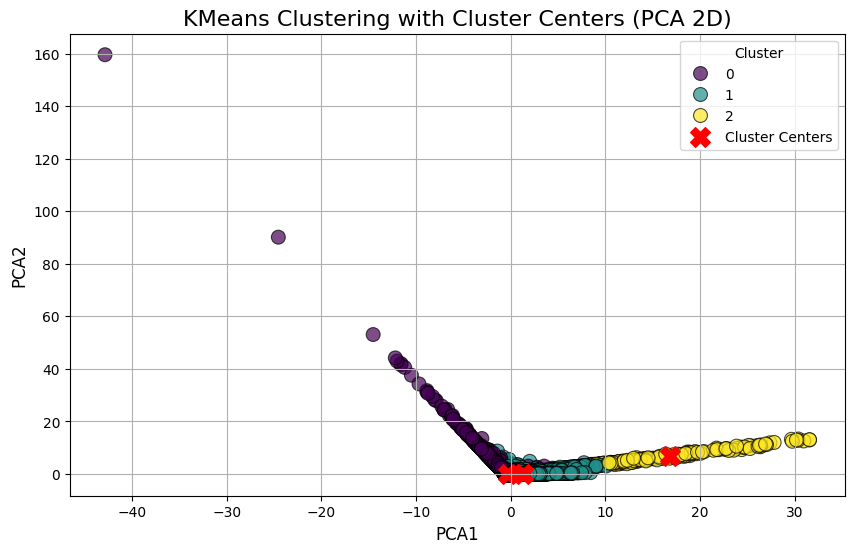

In [22]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Ensure column names are clean
# aggregated_df.columns = aggregated_df.columns.str.strip()

# # Define the required columns for clustering
# required_columns = [
#     "TCP DL Retrans. Vol (Bytes)",
#     "TCP UL Retrans. Vol (Bytes)",
#     "Avg RTT DL (ms)",
#     "Avg RTT UL (ms)",
#     "Avg Bearer TP DL (kbps)",
#     "Avg Bearer TP UL (kbps)",
# ]

# # Check for missing columns
# missing_columns = [col for col in required_columns if col not in aggregated_df.columns]
# if missing_columns:
#     print("Missing columns:", missing_columns)
# else:
#     # Select relevant columns
#     experience_metrics = aggregated_df[required_columns]

#     # Convert to numeric (if necessary) and handle missing values
#     experience_metrics = experience_metrics.apply(pd.to_numeric, errors="coerce")
#     experience_metrics.dropna(inplace=True)

#     # Standardize the data
#     scaler = StandardScaler()
#     scaled_experience_metrics = scaler.fit_transform(experience_metrics)

#     # Perform KMeans clustering
#     kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
#     aggregated_df["Experience_Cluster"] = kmeans.fit_predict(scaled_experience_metrics)

#     # Display cluster centers (scaled) and summary statistics
#     print("Cluster centers (scaled):", kmeans.cluster_centers_)
#     print(aggregated_df.groupby("Experience_Cluster").mean())
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_experience_metrics)

# Add the PCA components to the dataframe
aggregated_df["PCA1"] = pca_components[:, 0]
aggregated_df["PCA2"] = pca_components[:, 1]

# Plotting the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df,
    x="PCA1",
    y="PCA2",
    hue="Experience_Cluster",
    palette="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
)
plt.title("KMeans Clustering of User Experience Metrics (PCA 2D)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

# If you want to display the cluster centers on the plot as well
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df,
    x="PCA1",
    y="PCA2",
    hue="Experience_Cluster",
    palette="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
)
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Cluster Centers",
)
plt.title("KMeans Clustering with Cluster Centers (PCA 2D)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()


In [23]:
# Task 4.1: Assign Engagement and Experience Scores
# We will assign engagement and experience scores based on the Euclidean distance from the respective clusters.
# from scipy.spatial.distance import cdist
from scipy.spatial.distance import cdist

# Assuming you already have the engagement and experience data from previous steps
# You need the cluster centers to compute the Euclidean distance

# Define the engagement cluster center (for example, the first cluster)
engagement_cluster_center = kmeans.cluster_centers_[0]

# Calculate engagement score (Euclidean distance to the first cluster center)
aggregated_df["Engagement_Score"] = cdist(
    aggregated_df[["avg_TCP_retransmission", "avg_RTT", "avg_Throughput"]],
    [engagement_cluster_center],
    metric="euclidean",
)

# Define the worst experience cluster (for example, the last cluster)
worst_experience_cluster_center = kmeans.cluster_centers_[-1]

# Calculate experience score (Euclidean distance to the worst experience cluster center)
aggregated_df["Experience_Score"] = cdist(
    aggregated_df[["avg_TCP_retransmission", "avg_RTT", "avg_Throughput"]],
    [worst_experience_cluster_center],
    metric="euclidean",
)


In [24]:
aggregated_df


IMSI  avg_TCP_retransmission     avg_RTT  avg_Throughput  \
0       2.040471e+14            2.080991e+07  109.795706             2.0   
1       2.040808e+14            2.080991e+07  109.795706             1.0   
2       2.082001e+14            2.697000e+03  287.000000            87.0   
3       2.082001e+14            9.107000e+03   82.000000           627.0   
4       2.082001e+14            2.080991e+07   87.000000            38.0   
...              ...                     ...         ...             ...   
107260  2.082099e+14            2.080991e+07  109.795706             6.0   
107261  2.082099e+14            2.080991e+07  109.795706             6.0   
107262  2.082099e+14            3.704600e+04   40.000000           643.0   
107263  2.082522e+14            2.080991e+07  109.795706             0.0   
107264  2.140743e+14            2.080991e+07   57.000000             3.0   

              most_frequent_Handset_type  Experience_Cluster      PCA1  \
0       Quectel Wireless. Quectel Ec21-E                   0 -0.386306   
1       Quectel Wireless. Quectel Ec25-E                   0 -0.386340   
2       Dn Electronics Danew Konnect 350                   0 -0.603590   
3       Samsung Galaxy Grand (Gt-I9060X)                   0 -0.495356   
4                Apple iPhone 6S (A1688)                   0 -0.375089   
...                                  ...                 ...       ...   
107260       Samsung Galaxy J3 (Sm-J330)                   0 -0.386171   
107261                  Samsung Sm-G390F                   0 -0.386171   
107262                  Samsung Sm-G390F                   0 -0.476201   
107263       Asustek Zenfone Max Pro(M1)                   0 -0.386374   
107264                 Huawei Me909S-120                   0 -0.363115   

            PCA2  Engagement_Score  Experience_Score  
0      -0.045764      2.080991e+07      2.080989e+07  
1      -0.045767      2.080991e+07      2.080989e+07  
2       0.183522      2.713672e+03      2.691147e+03  
3      -0.152877      9.128992e+03      9.106272e+03  
4      -0.083244      2.080991e+07      2.080989e+07  
...          ...               ...               ...  
107260 -0.045752      2.080991e+07      2.080989e+07  
107261 -0.045752      2.080991e+07      2.080989e+07  
107262 -0.221998      3.705165e+04      3.702902e+04  
107263 -0.045770      2.080991e+07      2.080989e+07  
107264 -0.132815      2.080991e+07      2.080989e+07  

[107265 rows x 10 columns]

In [30]:
# # Check the first few rows to find a suitable customer identifier
# print(aggregated_df.head())

# # Calculate satisfaction score
# aggregated_df["Satisfaction_Score"] = (
#     aggregated_df["Engagement_Score"] + aggregated_df["Experience_Score"]
# ) / 2

# # Report top 10 satisfied customers
# top_10_satisfied = aggregated_df.sort_values("Satisfaction_Score").head(10)

# # Print top 10 satisfied customers using the correct identifier (e.g., MSISDN/Number)
# print(
#     top_10_satisfied[["MSISDN/Number", "Satisfaction_Score"]]
# )  # Use the correct column name here


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into features and target
X = aggregated_df[["avg_TCP_retransmission", "avg_RTT", "avg_Throughput"]]
y = aggregated_df["Satisfaction_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict satisfaction score
y_pred = model.predict(X_test)

# Report model performance
from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 39492454.34937173


In [33]:
# Prepare data for clustering (ensure numeric columns are selected)
engagement_experience_data = aggregated_df[["Engagement_Score", "Experience_Score"]]

# Perform k-means clustering (k=2)
kmeans2 = KMeans(n_clusters=2, random_state=42)
aggregated_df["Engagement_Experience_Cluster"] = kmeans2.fit_predict(
    engagement_experience_data
)

# Display cluster centers
print("Cluster centers:", kmeans2.cluster_centers_)

# Ensure only numeric columns are aggregated when computing the mean
numeric_columns = aggregated_df.select_dtypes(include=["number"]).columns
print(aggregated_df.groupby("Engagement_Experience_Cluster")[numeric_columns].mean())


Cluster centers: [[1.67978213e+07 1.67977994e+07]
 [2.22413108e+09 2.22413106e+09]]
                                       IMSI  avg_TCP_retransmission  \
Engagement_Experience_Cluster                                         
0                              2.082016e+14            1.679653e+07   
1                              2.082016e+14            2.224131e+09   

                                  avg_RTT  avg_Throughput  Experience_Cluster  \
Engagement_Experience_Cluster                                                   
0                              117.855044    11590.775038            0.171626   
1                              104.356875    62883.362083            2.000000   

                                    PCA1      PCA2  Engagement_Score  \
Engagement_Experience_Cluster                                          
0                              -0.025137 -0.010189      1.679782e+07   
1                              16.826914  6.820341      2.224131e+09   

                 

In [34]:
# Aggregate the average satisfaction & experience score per cluster
cluster_scores = aggregated_df.groupby("Engagement_Experience_Cluster")[
    ["Satisfaction_Score", "Experience_Score"]
].mean()
print(cluster_scores)


                               Satisfaction_Score  Experience_Score
Engagement_Experience_Cluster                                      
0                                    1.679781e+07      1.679780e+07
1                                    2.224131e+09      2.224131e+09


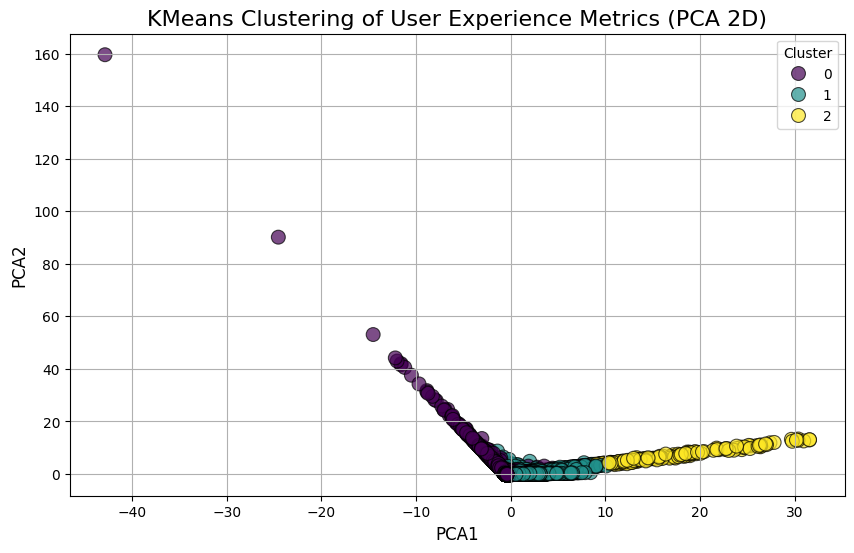

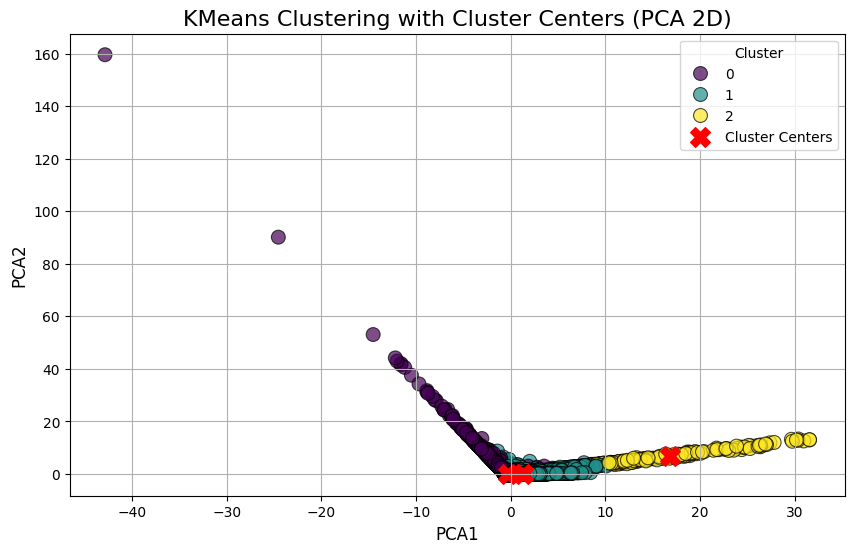

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Ensure column names are clean
# aggregated_df.columns = aggregated_df.columns.str.strip()

# # Define the required columns for clustering
# required_columns = [
#     "TCP DL Retrans. Vol (Bytes)",
#     "TCP UL Retrans. Vol (Bytes)",
#     "Avg RTT DL (ms)",
#     "Avg RTT UL (ms)",
#     "Avg Bearer TP DL (kbps)",
#     "Avg Bearer TP UL (kbps)",
# ]

# # Check for missing columns
# missing_columns = [col for col in required_columns if col not in aggregated_df.columns]
# if missing_columns:
#     print("Missing columns:", missing_columns)
# else:
#     # Select relevant columns
#     experience_metrics = aggregated_df[required_columns]

#     # Convert to numeric (if necessary) and handle missing values
#     experience_metrics = experience_metrics.apply(pd.to_numeric, errors="coerce")
#     experience_metrics.dropna(inplace=True)

#     # Standardize the data
#     scaler = StandardScaler()
#     scaled_experience_metrics = scaler.fit_transform(experience_metrics)

#     # Perform KMeans clustering
#     kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
#     aggregated_df["Experience_Cluster"] = kmeans.fit_predict(scaled_experience_metrics)

#     # Display cluster centers (scaled) and summary statistics
#     print("Cluster centers (scaled):", kmeans.cluster_centers_)
#     print(aggregated_df.groupby("Experience_Cluster").mean())
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_experience_metrics)

# Add the PCA components to the dataframe
aggregated_df["PCA1"] = pca_components[:, 0]
aggregated_df["PCA2"] = pca_components[:, 1]

# Plotting the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df,
    x="PCA1",
    y="PCA2",
    hue="Experience_Cluster",
    palette="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
)
plt.title("KMeans Clustering of User Experience Metrics (PCA 2D)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

# If you want to display the cluster centers on the plot as well
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df,
    x="PCA1",
    y="PCA2",
    hue="Experience_Cluster",
    palette="viridis",
    s=100,
    edgecolor="black",
    alpha=0.7,
)
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Cluster Centers",
)
plt.title("KMeans Clustering with Cluster Centers (PCA 2D)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()
